# Implementing a Neural Network
In this exercise we will develop a neural network with fully-connected layers to perform a regression task and a classification task. You need to implement two classes, `DenseLayer` and `Feedforward`, and the `train` function `in implementation.py` 

In [1]:
# A bit of setup

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

#need to have these two lines to work on my PC
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2
%autosave 60


Autosaving every 60 seconds


## 1. Implement the two classes and one function (10 points)

In this step, you should implement the two classes and one function mentioned above. The autograder can check the correcness of your two classes, `DenseLayer` and `Feedforward`. Correct implementation of each of the two classes worths 5 points, so you will 10 points if you make both correct. 

The autograder cannot check the training function because this function takes too much time to run. 



## 2. A toy regression problem

By this step, you should already have implemented all necessary classes and functions in `implementation.py`. In this task, we have a toy regression problem. Please the data below and think about this question: is overfitting a problem for this problem? **Please write your answer below** (This particular question has no points, but you may want to show your thought). 

Overfitting is most likely not an issue for this problem as all points are directly sampled from the underlying function. Because there is no random variation introduced, a network acting as a universal function approximator will not attempt to account for such random variations. Therefore, a function will be able to be identified that is able to match the observed data with 100% accuracy.

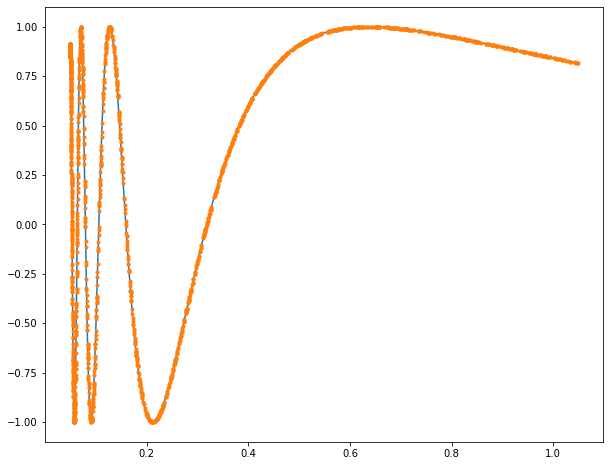

In [2]:
def target_func(x):
    y = np.sin(1 / x)
    return y

# initialize training and validation sets. 
x_train = np.power(np.random.random_sample([2000, 1]), 4) + 0.05
y_train = target_func(x_train)

x_val = np.power(np.random.random_sample([2000, 1]), 4) + 0.05
y_val = target_func(x_val)


# plot the function and data points
# Do you worry about overfitting problem?
sort_ind = np.argsort(x_train[:, 0])
plt.plot(x_train[sort_ind, 0], y_train[sort_ind, 0])
plt.plot(x_train[sort_ind, 0], y_train[sort_ind, 0], '.')


### Train the model  (5 points)

Now lets run your `train` function on this data. You will need to save your model to a file and submit it. We will test your saved model. You will earn 
 * 2 points if your validation MSE is smaller than 0.1
 * 4 points if your validation MSE is smaller than 0.05
 * 5 points if your validation MSE is smaller than 0.01



In [3]:
from implementation import train

# model, history = train(x_train, y_train, x_val, y_val, depth=4, hidden_sizes=[8, 8, 8], 
#                        reg_weight=0.000001, num_train_epochs=150, task_type='regression')

#For testing
# TODO- ask Kapil if I can use my own settings for reg_weight and num epochs
model, history = train(x_train, y_train, x_val, y_val, depth=4, hidden_sizes=[512, 256, 128], 
                       reg_weight=0.0001, num_train_epochs=1000, task_type='regression') #this works well

# model, history = train(x_train, y_train, x_val, y_val, depth=4, hidden_sizes=[8, 8, 8], 
#                        reg_weight=0.0001, num_train_epochs=500, task_type='regression')




Epoch 1/1000

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

8/8 [==============================] - 0s 13ms/step - loss: 0.5806 - accuracy: 0.0000e+00 - val_loss: 0.4850 - val_accuracy: 0.0000e+00
Epoch 2/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.4671 - accuracy: 0.0000e+00 - val_loss: 0.4637 - val_accuracy: 0.0000e+00
Epoch 3/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.4351 - accuracy: 0.0000e+00 - val_loss: 0.4312 - val_accuracy: 0.0000e+00
Epoch 4/1000
8/8 [==============================] - 0s 3ms/step

8/8 [==============================] - 0s 3ms/step - loss: 0.2841 - accuracy: 0.0000e+00 - val_loss: 0.2944 - val_accuracy: 0.0000e+00
Epoch 52/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.2837 - accuracy: 0.0000e+00 - val_loss: 0.2959 - val_accuracy: 0.0000e+00
Epoch 53/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.2834 - accuracy: 0.0000e+00 - val_loss: 0.2947 - val_accuracy: 0.0000e+00
Epoch 54/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.2836 - accuracy: 0.0000e+00 - val_loss: 0.2944 - val_accuracy: 0.0000e+00
Epoch 55/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.2837 - accuracy: 0.0000e+00 - val_loss: 0.2959 - val_accuracy: 0.0000e+00
Epoch 56/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.2847 - accuracy: 0.0000e+00 - val_loss: 0.2959 - val_accuracy: 0.0000e+00
Epoch 57/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.2846 - accuracy: 0.0000e+00 - val_loss: 0.295

8/8 [==============================] - 0s 3ms/step - loss: 0.2838 - accuracy: 0.0000e+00 - val_loss: 0.2944 - val_accuracy: 0.0000e+00
Epoch 107/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.2835 - accuracy: 0.0000e+00 - val_loss: 0.2950 - val_accuracy: 0.0000e+00
Epoch 108/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.2849 - accuracy: 0.0000e+00 - val_loss: 0.2944 - val_accuracy: 0.0000e+00
Epoch 109/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.2841 - accuracy: 0.0000e+00 - val_loss: 0.2948 - val_accuracy: 0.0000e+00
Epoch 110/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.2844 - accuracy: 0.0000e+00 - val_loss: 0.2970 - val_accuracy: 0.0000e+00
Epoch 111/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.2856 - accuracy: 0.0000e+00 - val_loss: 0.2975 - val_accuracy: 0.0000e+00
Epoch 112/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.2852 - accuracy: 0.0000e+00 - val_loss:

Epoch 161/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.2829 - accuracy: 0.0000e+00 - val_loss: 0.2948 - val_accuracy: 0.0000e+00
Epoch 162/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.2836 - accuracy: 0.0000e+00 - val_loss: 0.2940 - val_accuracy: 0.0000e+00
Epoch 163/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.2849 - accuracy: 0.0000e+00 - val_loss: 0.2977 - val_accuracy: 0.0000e+00
Epoch 164/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.2847 - accuracy: 0.0000e+00 - val_loss: 0.2942 - val_accuracy: 0.0000e+00
Epoch 165/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.2839 - accuracy: 0.0000e+00 - val_loss: 0.2939 - val_accuracy: 0.0000e+00
Epoch 166/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.2844 - accuracy: 0.0000e+00 - val_loss: 0.2944 - val_accuracy: 0.0000e+00
Epoch 167/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.2839 - accuracy: 0.0000e

8/8 [==============================] - 0s 3ms/step - loss: 0.2728 - accuracy: 0.0000e+00 - val_loss: 0.2813 - val_accuracy: 0.0000e+00
Epoch 216/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.2730 - accuracy: 0.0000e+00 - val_loss: 0.2804 - val_accuracy: 0.0000e+00
Epoch 217/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.2727 - accuracy: 0.0000e+00 - val_loss: 0.2799 - val_accuracy: 0.0000e+00
Epoch 218/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.2724 - accuracy: 0.0000e+00 - val_loss: 0.2798 - val_accuracy: 0.0000e+00
Epoch 219/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.2718 - accuracy: 0.0000e+00 - val_loss: 0.2793 - val_accuracy: 0.0000e+00
Epoch 220/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.2707 - accuracy: 0.0000e+00 - val_loss: 0.2782 - val_accuracy: 0.0000e+00
Epoch 221/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.2708 - accuracy: 0.0000e+00 - val_loss:

Epoch 270/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.2173 - accuracy: 0.0000e+00 - val_loss: 0.2178 - val_accuracy: 0.0000e+00
Epoch 271/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.2156 - accuracy: 0.0000e+00 - val_loss: 0.2188 - val_accuracy: 0.0000e+00
Epoch 272/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.2140 - accuracy: 0.0000e+00 - val_loss: 0.2164 - val_accuracy: 0.0000e+00
Epoch 273/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.2166 - accuracy: 0.0000e+00 - val_loss: 0.2230 - val_accuracy: 0.0000e+00
Epoch 274/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.2148 - accuracy: 0.0000e+00 - val_loss: 0.2109 - val_accuracy: 0.0000e+00
Epoch 275/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.2095 - accuracy: 0.0000e+00 - val_loss: 0.2096 - val_accuracy: 0.0000e+00
Epoch 276/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.2104 - accuracy: 0.0000e

8/8 [==============================] - 0s 3ms/step - loss: 0.1860 - accuracy: 0.0000e+00 - val_loss: 0.1825 - val_accuracy: 0.0000e+00
Epoch 325/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.1831 - accuracy: 0.0000e+00 - val_loss: 0.1856 - val_accuracy: 0.0000e+00
Epoch 326/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.1862 - accuracy: 0.0000e+00 - val_loss: 0.1857 - val_accuracy: 0.0000e+00
Epoch 327/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.1824 - accuracy: 0.0000e+00 - val_loss: 0.1916 - val_accuracy: 0.0000e+00
Epoch 328/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.1824 - accuracy: 0.0000e+00 - val_loss: 0.1820 - val_accuracy: 0.0000e+00
Epoch 329/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.1806 - accuracy: 0.0000e+00 - val_loss: 0.1810 - val_accuracy: 0.0000e+00
Epoch 330/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.1830 - accuracy: 0.0000e+00 - val_loss:

Epoch 379/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.1795 - accuracy: 0.0000e+00 - val_loss: 0.1821 - val_accuracy: 0.0000e+00
Epoch 380/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.1815 - accuracy: 0.0000e+00 - val_loss: 0.1814 - val_accuracy: 0.0000e+00
Epoch 381/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.1812 - accuracy: 0.0000e+00 - val_loss: 0.1797 - val_accuracy: 0.0000e+00
Epoch 382/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.1796 - accuracy: 0.0000e+00 - val_loss: 0.1812 - val_accuracy: 0.0000e+00
Epoch 383/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.1796 - accuracy: 0.0000e+00 - val_loss: 0.1832 - val_accuracy: 0.0000e+00
Epoch 384/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.1796 - accuracy: 0.0000e+00 - val_loss: 0.1821 - val_accuracy: 0.0000e+00
Epoch 385/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.1791 - accuracy: 0.0000e

8/8 [==============================] - 0s 4ms/step - loss: 0.1784 - accuracy: 0.0000e+00 - val_loss: 0.1796 - val_accuracy: 0.0000e+00
Epoch 434/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.1800 - accuracy: 0.0000e+00 - val_loss: 0.1800 - val_accuracy: 0.0000e+00
Epoch 435/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.1789 - accuracy: 0.0000e+00 - val_loss: 0.1828 - val_accuracy: 0.0000e+00
Epoch 436/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.1820 - accuracy: 0.0000e+00 - val_loss: 0.1848 - val_accuracy: 0.0000e+00
Epoch 437/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.1824 - accuracy: 0.0000e+00 - val_loss: 0.1813 - val_accuracy: 0.0000e+00
Epoch 438/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.1793 - accuracy: 0.0000e+00 - val_loss: 0.1808 - val_accuracy: 0.0000e+00
Epoch 439/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.1786 - accuracy: 0.0000e+00 - val_loss:

Epoch 488/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.1778 - accuracy: 0.0000e+00 - val_loss: 0.1808 - val_accuracy: 0.0000e+00
Epoch 489/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.1811 - accuracy: 0.0000e+00 - val_loss: 0.1814 - val_accuracy: 0.0000e+00
Epoch 490/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.1798 - accuracy: 0.0000e+00 - val_loss: 0.1801 - val_accuracy: 0.0000e+00
Epoch 491/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.1777 - accuracy: 0.0000e+00 - val_loss: 0.1809 - val_accuracy: 0.0000e+00
Epoch 492/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.1780 - accuracy: 0.0000e+00 - val_loss: 0.1811 - val_accuracy: 0.0000e+00
Epoch 493/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.1788 - accuracy: 0.0000e+00 - val_loss: 0.1799 - val_accuracy: 0.0000e+00
Epoch 494/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.1784 - accuracy: 0.0000e

8/8 [==============================] - 0s 4ms/step - loss: 0.1782 - accuracy: 0.0000e+00 - val_loss: 0.1799 - val_accuracy: 0.0000e+00
Epoch 543/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.1777 - accuracy: 0.0000e+00 - val_loss: 0.1817 - val_accuracy: 0.0000e+00
Epoch 544/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.1787 - accuracy: 0.0000e+00 - val_loss: 0.1801 - val_accuracy: 0.0000e+00
Epoch 545/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.1775 - accuracy: 0.0000e+00 - val_loss: 0.1791 - val_accuracy: 0.0000e+00
Epoch 546/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.1778 - accuracy: 0.0000e+00 - val_loss: 0.1793 - val_accuracy: 0.0000e+00
Epoch 547/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.1772 - accuracy: 0.0000e+00 - val_loss: 0.1792 - val_accuracy: 0.0000e+00
Epoch 548/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.1771 - accuracy: 0.0000e+00 - val_loss:

Epoch 597/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.1773 - accuracy: 0.0000e+00 - val_loss: 0.1832 - val_accuracy: 0.0000e+00
Epoch 598/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.1786 - accuracy: 0.0000e+00 - val_loss: 0.1802 - val_accuracy: 0.0000e+00
Epoch 599/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.1783 - accuracy: 0.0000e+00 - val_loss: 0.1790 - val_accuracy: 0.0000e+00
Epoch 600/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.1778 - accuracy: 0.0000e+00 - val_loss: 0.1791 - val_accuracy: 0.0000e+00
Epoch 601/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.1773 - accuracy: 0.0000e+00 - val_loss: 0.1795 - val_accuracy: 0.0000e+00
Epoch 602/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.1773 - accuracy: 0.0000e+00 - val_loss: 0.1800 - val_accuracy: 0.0000e+00
Epoch 603/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.1790 - accuracy: 0.0000e

8/8 [==============================] - 0s 3ms/step - loss: 0.1741 - accuracy: 0.0000e+00 - val_loss: 0.1753 - val_accuracy: 0.0000e+00
Epoch 652/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.1732 - accuracy: 0.0000e+00 - val_loss: 0.1749 - val_accuracy: 0.0000e+00
Epoch 653/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.1728 - accuracy: 0.0000e+00 - val_loss: 0.1742 - val_accuracy: 0.0000e+00
Epoch 654/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.1734 - accuracy: 0.0000e+00 - val_loss: 0.1761 - val_accuracy: 0.0000e+00
Epoch 655/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.1726 - accuracy: 0.0000e+00 - val_loss: 0.1747 - val_accuracy: 0.0000e+00
Epoch 656/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.1724 - accuracy: 0.0000e+00 - val_loss: 0.1732 - val_accuracy: 0.0000e+00
Epoch 657/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.1706 - accuracy: 0.0000e+00 - val_loss:

Epoch 706/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.1210 - accuracy: 0.0000e+00 - val_loss: 0.1253 - val_accuracy: 0.0000e+00
Epoch 707/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.1196 - accuracy: 0.0000e+00 - val_loss: 0.1237 - val_accuracy: 0.0000e+00
Epoch 708/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.1189 - accuracy: 0.0000e+00 - val_loss: 0.1237 - val_accuracy: 0.0000e+00
Epoch 709/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.1171 - accuracy: 0.0000e+00 - val_loss: 0.1215 - val_accuracy: 0.0000e+00
Epoch 710/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.1151 - accuracy: 0.0000e+00 - val_loss: 0.1198 - val_accuracy: 0.0000e+00
Epoch 711/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.1141 - accuracy: 0.0000e+00 - val_loss: 0.1193 - val_accuracy: 0.0000e+00
Epoch 712/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.1131 - accuracy: 0.0000e

8/8 [==============================] - 0s 3ms/step - loss: 0.0264 - accuracy: 0.0000e+00 - val_loss: 0.0267 - val_accuracy: 0.0000e+00
Epoch 761/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0256 - accuracy: 0.0000e+00 - val_loss: 0.0260 - val_accuracy: 0.0000e+00
Epoch 762/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0250 - accuracy: 0.0000e+00 - val_loss: 0.0245 - val_accuracy: 0.0000e+00
Epoch 763/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0238 - accuracy: 0.0000e+00 - val_loss: 0.0245 - val_accuracy: 0.0000e+00
Epoch 764/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0231 - accuracy: 0.0000e+00 - val_loss: 0.0226 - val_accuracy: 0.0000e+00
Epoch 765/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0227 - accuracy: 0.0000e+00 - val_loss: 0.0221 - val_accuracy: 0.0000e+00
Epoch 766/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0208 - accuracy: 0.0000e+00 - val_loss:

Epoch 815/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0036 - accuracy: 0.0000e+00 - val_loss: 0.0036 - val_accuracy: 0.0000e+00
Epoch 816/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0036 - accuracy: 0.0000e+00 - val_loss: 0.0033 - val_accuracy: 0.0000e+00
Epoch 817/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0034 - accuracy: 0.0000e+00 - val_loss: 0.0034 - val_accuracy: 0.0000e+00
Epoch 818/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0034 - accuracy: 0.0000e+00 - val_loss: 0.0037 - val_accuracy: 0.0000e+00
Epoch 819/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0034 - accuracy: 0.0000e+00 - val_loss: 0.0032 - val_accuracy: 0.0000e+00
Epoch 820/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0030 - accuracy: 0.0000e+00 - val_loss: 0.0031 - val_accuracy: 0.0000e+00
Epoch 821/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0030 - accuracy: 0.0000e

8/8 [==============================] - 0s 4ms/step - loss: 0.0014 - accuracy: 0.0000e+00 - val_loss: 0.0016 - val_accuracy: 0.0000e+00
Epoch 870/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 0.0000e+00 - val_loss: 0.0012 - val_accuracy: 0.0000e+00
Epoch 871/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0013 - accuracy: 0.0000e+00 - val_loss: 0.0013 - val_accuracy: 0.0000e+00
Epoch 872/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 0.0000e+00 - val_loss: 0.0012 - val_accuracy: 0.0000e+00
Epoch 873/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 0.0000e+00 - val_loss: 0.0012 - val_accuracy: 0.0000e+00
Epoch 874/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 0.0000e+00 - val_loss: 0.0013 - val_accuracy: 0.0000e+00
Epoch 875/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 0.0000e+00 - val_loss:

Epoch 923/1000
8/8 [==============================] - 0s 3ms/step - loss: 8.8559e-04 - accuracy: 0.0000e+00 - val_loss: 7.4159e-04 - val_accuracy: 0.0000e+00
Epoch 924/1000
8/8 [==============================] - 0s 3ms/step - loss: 7.1374e-04 - accuracy: 0.0000e+00 - val_loss: 7.3839e-04 - val_accuracy: 0.0000e+00
Epoch 925/1000
8/8 [==============================] - 0s 3ms/step - loss: 7.3195e-04 - accuracy: 0.0000e+00 - val_loss: 9.4607e-04 - val_accuracy: 0.0000e+00
Epoch 926/1000
8/8 [==============================] - 0s 3ms/step - loss: 8.4137e-04 - accuracy: 0.0000e+00 - val_loss: 0.0011 - val_accuracy: 0.0000e+00
Epoch 927/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0010 - accuracy: 0.0000e+00 - val_loss: 0.0011 - val_accuracy: 0.0000e+00
Epoch 928/1000
8/8 [==============================] - 0s 3ms/step - loss: 9.9852e-04 - accuracy: 0.0000e+00 - val_loss: 9.0266e-04 - val_accuracy: 0.0000e+00
Epoch 929/1000
8/8 [==============================] - 0s 3ms/ste

8/8 [==============================] - 0s 3ms/step - loss: 6.6224e-04 - accuracy: 0.0000e+00 - val_loss: 7.7609e-04 - val_accuracy: 0.0000e+00
Epoch 976/1000
8/8 [==============================] - 0s 3ms/step - loss: 6.2495e-04 - accuracy: 0.0000e+00 - val_loss: 6.8354e-04 - val_accuracy: 0.0000e+00
Epoch 977/1000
8/8 [==============================] - 0s 3ms/step - loss: 6.1215e-04 - accuracy: 0.0000e+00 - val_loss: 7.0039e-04 - val_accuracy: 0.0000e+00
Epoch 978/1000
8/8 [==============================] - 0s 3ms/step - loss: 6.1991e-04 - accuracy: 0.0000e+00 - val_loss: 5.7351e-04 - val_accuracy: 0.0000e+00
Epoch 979/1000
8/8 [==============================] - 0s 4ms/step - loss: 5.8313e-04 - accuracy: 0.0000e+00 - val_loss: 6.8570e-04 - val_accuracy: 0.0000e+00
Epoch 980/1000
8/8 [==============================] - 0s 3ms/step - loss: 6.0373e-04 - accuracy: 0.0000e+00 - val_loss: 5.7047e-04 - val_accuracy: 0.0000e+00
Epoch 981/1000
8/8 [==============================] - 0s 3ms/step -

### Plot training trace and the fitted model

Text(0, 0.5, 'Loss')

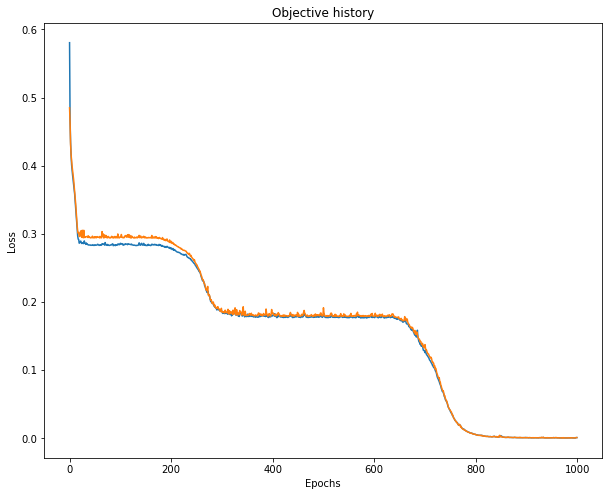

In [4]:
# Plot the loss function and train / validation accuracies
plt.subplot(1, 1, 1)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title('Objective history')
plt.xlabel('Epochs')
plt.ylabel('Loss')


I am in the network function!


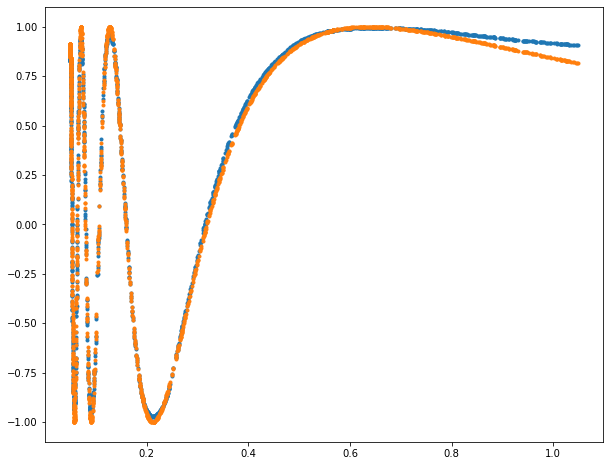

In [5]:
y_pred = model.predict(x_val)

plt.plot(x_val[:, 0], y_pred[:, 0], '.')

#to check results
plt.plot(x_val[:, 0], y_val[:, 0], '.')

### Save the model 

Please save your model as follows. Make sure the saved model can be loaded correctly with `tf.keras.models.load_model('sin_inv_x.kmod')`. *If your model cannot be loaded, you will get zero points for this problem.*



In [6]:
model.save('sin_inv_x.kmod')


I am in the network function!
I am in the network function!
I am in the network function!
I am in the network function!
I am in the network function!
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
I am in the network function!
I am in the network function!
INFO:tensorflow:Assets written to: sin_inv_x.kmod\assets


## 3. Classifying hand-written digits

This task is a classification problem on the famous MNIST dataset. 

### Load the data

In [7]:
from sklearn.model_selection import train_test_split

# load the dataset
data_train, data_test = tf.keras.datasets.mnist.load_data()

# separate a validation set
x_train, y_train = data_train 
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, train_size=0.8, stratify=y_train)

x_test, y_test = data_test

# treating images as vectors and create one hot representations of labesl

x_train = x_train.reshape([-1, 28 * 28])
x_val = x_val.reshape([-1, 28 * 28])
x_test = x_test.reshape([-1, 28 * 28])

y_train = tf.one_hot(y_train, depth=10).numpy()
y_val = tf.one_hot(y_val, depth=10).numpy()
y_test = tf.one_hot(y_test, depth=10).numpy()


print('Shape of training input: ', x_train.shape)
print('Shape of training labels: ', y_train.shape)
print('Shape of validation input: ', x_val.shape)
print('Shape of validation labels: ', y_val.shape)
print('Shape of test input: ', x_test.shape)
print('Shape of test labels: ', y_test.shape)



Shape of training input:  (48000, 784)
Shape of training labels:  (48000, 10)
Shape of validation input:  (12000, 784)
Shape of validation labels:  (12000, 10)
Shape of test input:  (10000, 784)
Shape of test labels:  (10000, 10)


In [8]:
#Test
print(tf.shape(x_train))

tf.Tensor([48000   784], shape=(2,), dtype=int32)


### Train a model

In [9]:
from implementation import train

#default - was able to get >90% accuracy with default training settings
model, history = train(x_train, y_train, x_val, y_val, depth=3, hidden_sizes=[8, 8], reg_weight=0.01, num_train_epochs=40,  task_type='classification')

#debug
# model, history = train(x_train, y_train, x_val, y_val, depth=4, hidden_sizes=[64, 64, 64], reg_weight=0.001, num_train_epochs=100,  task_type='classification')
# model, history = train(x_train, y_train, x_val, y_val, depth=3, hidden_sizes=[8, 8], reg_weight=0.01, num_train_epochs=25,  task_type='classification')


Epoch 1/40
188/188 [==============================] - 0s 2ms/step - loss: 0.0783 - accuracy: 0.3913 - val_loss: 0.0538 - val_accuracy: 0.5304
Epoch 2/40
188/188 [==============================] - 0s 2ms/step - loss: 0.0482 - accuracy: 0.6289 - val_loss: 0.0455 - val_accuracy: 0.6590
Epoch 3/40
188/188 [==============================] - 0s 2ms/step - loss: 0.0412 - accuracy: 0.6890 - val_loss: 0.0389 - val_accuracy: 0.7020
Epoch 4/40
188/188 [==============================] - 0s 2ms/step - loss: 0.0377 - accuracy: 0.7111 - val_loss: 0.0371 - val_accuracy: 0.7148
Epoch 5/40
188/188 [==============================] - 0s 2ms/step - loss: 0.0354 - accuracy: 0.7222 - val_loss: 0.0348 - val_accuracy: 0.7249
Epoch 6/40
188/188 [==============================] - 0s 2ms/step - loss: 0.0338 - accuracy: 0.7295 - val_loss: 0.0332 - val_accuracy: 0.7355
Epoch 7/40
188/188 [==============================] - 0s 2ms/step - loss: 0.0329 - accuracy: 0.7349 - val_loss: 0.0324 - val_accuracy: 0.7418
Epoch 

### Debug the training (10 points)

A neural network with your initial setting may not work straightforwardly, so you will need to diagnose the problems in the training procedure. One strategy for getting insight into what's wrong is to plot the loss function and the accuracies on the training and validation sets during optimization.

Another strategy is to visualize the weights that were learned in the first layer of the network. In most neural networks trained on visual data, the first layer weights typically show some visible structure when visualized.

**Tuning**. Tuning the hyperparameters and developing intuition for how they affect the final performance is a large part of using Neural Networks. This task gives you a chance to gain some experience. Below, you should experiment with different values of the various hyperparameters, including 
 * data preparation (data normalization and data augmentation)
 * the achitecture (depth, hidden layer sizes, and activation functions), 
 * optimization (optimization algorithm, learning rate, learning rate decay, batch size, and numer of training epochs)
 * regularization (regularization weight, dropout).

**Expected results**. You goal in this exercise is to get as good of a result as you can, with a fully-connected Neural Network. Feel free implement your own techniques (e.g. PCA to reduce dimensionality, or adding dropout, or adding features to the solver, etc.).  You should be aim to achieve a classification accuracy of greater than 80% on the test results.

**Grading**. You will get 
  * 5 points if your model has an accuracy over 0.70
  * 8 points if your model has an accuracy over 0.80
  * 10 points if your model has an accuracy over 0.90

In [10]:
#debug
print(history.history.keys()) #only shows up as having "loss" and "val_loss", no accuracy or val_accuracy

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


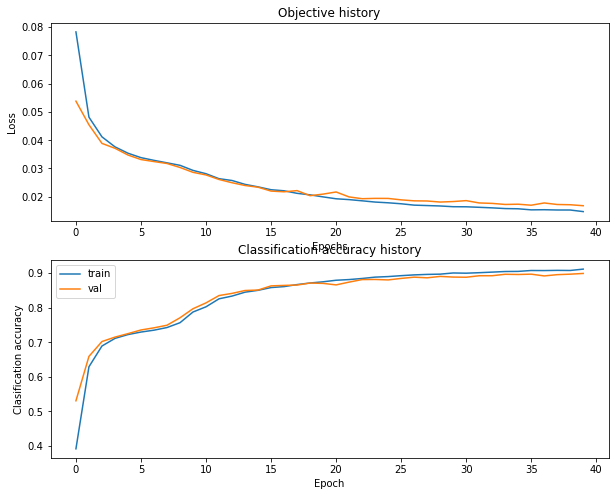

In [11]:




# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title('Objective history')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.legend()
plt.show()


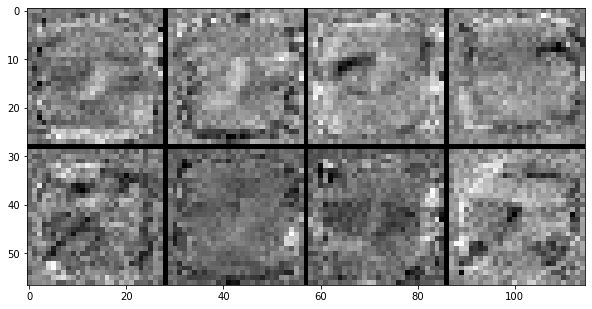

In [12]:
from vis_utils import visualize_grid

#was this
# W1 = model.layers[0].W.numpy()
# W1 = W1.transpose()
# W1 = W1.reshape([W1.shape[0], 28, 28, 1])

# plt.imshow(visualize_grid(W1))

#debug
W1 = model.model.layers[0].kernel.numpy() #-> found the error TODO: change model.model to just model.
W1 = W1.transpose()
W1 = W1.reshape([W1.shape[0], 28, 28, 1])

plt.imshow(visualize_grid(W1))

Finally, test the model on the test set and show the accuracy. 

In [13]:
y_pred = model.predict(x_test.astype(np.float32))

acc = np.mean(np.argmax(y_test, axis=1) == np.argmax(y_pred, axis=1))

print('The test accuracy is ', acc)

I am in the network function!
The test accuracy is  0.8971


### Save the model

In [14]:
model.save('mnist_cls.kmod')

I am in the network function!
I am in the network function!
I am in the network function!
I am in the network function!
I am in the network function!
I am in the network function!
I am in the network function!
INFO:tensorflow:Assets written to: mnist_cls.kmod\assets


## Question (5 points): what have you learned from this assignment? 

Please summarize your model tuning experience into three points below. If possible, please elaborate after your summarization. 

*Answer*:
